## july

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [2]:
%%time
july = pd.read_pickle('../data/july_geo.pkl')

Wall time: 1min 44s


In [3]:
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376)
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770)
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.80710 36.14872)
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80861 36.14713)
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.80067 36.13820)


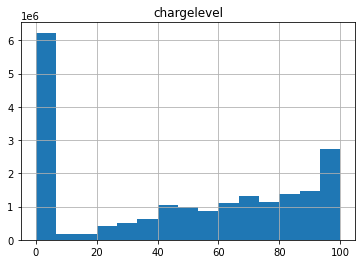

In [4]:
july.hist(column = 'chargelevel', bins = 15)
plt.show()

In [5]:
zone = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
zone.head(5)

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


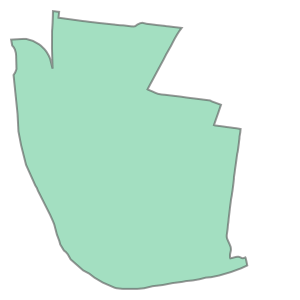

In [6]:
zone.loc[0, 'geometry']

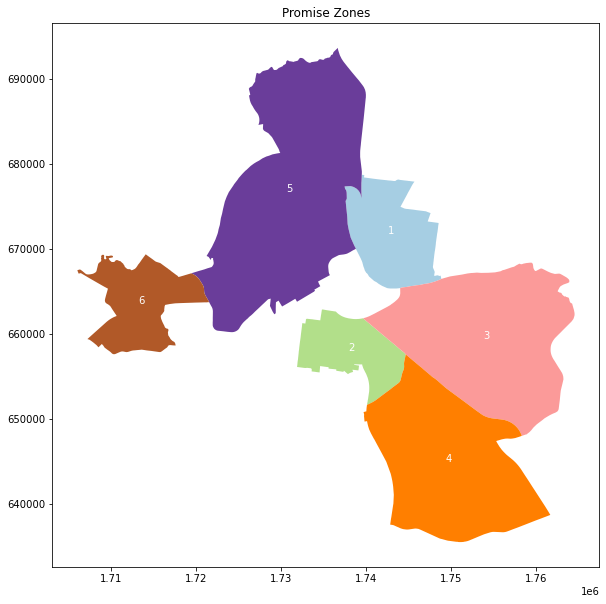

In [7]:
fig, ax = plt.subplots(figsize = (10,10))
zone.plot(ax = ax, column = 'ZONE_ID', cmap = 'Paired')

for index, row in zone.iterrows():
    plt.annotate(text=row['ZONE_ID'],
                xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center', color = 'white')
plt.title('Promise Zones');

In [8]:
count = july.value_counts('sumdid').unique()
count

array([8915, 8910, 8909, ...,    3,    2,    1], dtype=int64)

In [9]:
july['date'] = july['pubdatetime'].dt.date
july['day'] = july['pubdatetime'].dt.day
july['hour'] = july['pubdatetime'].dt.hour


In [10]:
july.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376),2019-07-22,22,23
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770),2019-07-11,11,12
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.80710 36.14872),2019-07-11,11,12
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80861 36.14713),2019-07-11,11,12
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.80067 36.13820),2019-07-11,11,12


In [11]:
# focus only on scooters with 100 charged
full_charge = july.loc[july['chargelevel'] == 100]
full_charge

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376),2019-07-22,22,23
9013191,2019-07-11 12:06:22.510,36.157701,-86.784192,PoweredNLTKH,100.0,0.15,Bird,POINT (-86.78419 36.15770),2019-07-11,11,12
9013190,2019-07-11 12:06:22.510,36.148716,-86.807103,PoweredBNP4F,100.0,0.15,Bird,POINT (-86.80710 36.14872),2019-07-11,11,12
9013189,2019-07-11 12:06:22.510,36.147127,-86.808608,PoweredQYRFC,100.0,0.15,Bird,POINT (-86.80861 36.14713),2019-07-11,11,12
9013188,2019-07-11 12:06:22.510,36.138204,-86.800673,PoweredEQH7F,100.0,0.15,Bird,POINT (-86.80067 36.13820),2019-07-11,11,12
...,...,...,...,...,...,...,...,...,...,...,...
17092735,2019-07-21 15:52:10.980,36.158228,-86.783888,Powered402686,100.0,0.15,Lyft,POINT (-86.78389 36.15823),2019-07-21,21,15
17092729,2019-07-21 15:51:53.617,36.169344,-86.802608,Powered414680,100.0,0.15,Lyft,POINT (-86.80261 36.16934),2019-07-21,21,15
21156727,2019-07-27 00:56:57.007,36.127225,-86.786293,Powered520856,100.0,0.15,Lyft,POINT (-86.78629 36.12723),2019-07-27,27,0
13961824,2019-07-17 15:08:13.070,36.166384,-86.779288,Powered329834,100.0,0.15,Lyft,POINT (-86.77929 36.16638),2019-07-17,17,15


In [12]:
full_charge.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1335009 entries, 18106104 to 13961825
Data columns (total 11 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   pubdatetime  1335009 non-null  datetime64[ns]
 1   latitude     1335009 non-null  float64       
 2   longitude    1335009 non-null  float64       
 3   sumdid       1335009 non-null  object        
 4   chargelevel  1335009 non-null  float64       
 5   costpermin   1335009 non-null  float64       
 6   companyname  1335009 non-null  object        
 7   geometry     1335009 non-null  geometry      
 8   date         1335009 non-null  object        
 9   day          1335009 non-null  int64         
 10  hour         1335009 non-null  int64         
dtypes: datetime64[ns](1), float64(4), geometry(1), int64(2), object(3)
memory usage: 122.2+ MB


In [13]:
full_unique = full_charge['sumdid'].unique()
full_unique

array(['PoweredJALW3', 'PoweredNLTKH', 'PoweredBNP4F', ...,
       'Powered313182', 'Powered788506', 'Powered238934'], dtype=object)

In [14]:
full_counts = full_charge['sumdid'].value_counts()
full_counts

PoweredLRUNZKBZJN7PB                           6409
Powered6LPXBDNWNER26                           3345
PoweredP2WO4FX2O5GE6                           3192
Powered414680                                  3170
PoweredOEH656K4QUCPD                           3117
                                               ... 
Powered53f80a37-fcca-5973-bb74-4b67a4d6c565       1
PoweredGMWUZUY6SSMNQ                              1
Powered6PL5PAQ44POVN                              1
PoweredTJ677IEJM34BS                              1
Powered275981                                     1
Name: sumdid, Length: 4347, dtype: int64

In [15]:
full_day_of_month = full_charge['day'].value_counts().sort_index()
full_day_of_month

1     58807
2     40744
3     48259
4     50326
5     43771
6     56170
7     62182
8     49832
9     37806
10    39340
11    51329
12    42691
13    50095
14    44541
15    46361
16    48556
17    42854
18    39258
19    40507
20    35504
21    40176
22    34151
23    29974
24    31966
25    32592
26    39958
27    37943
28    45752
29    35955
30    35477
31    42132
Name: day, dtype: int64

In [16]:
#focus on scooters with 0 charge
dead_charge = july.loc[july['chargelevel'] == 0]
dead_charge

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour
14088404,2019-07-17 18:23:13.000,36.120000,-86.753400,Powered4501372e-4eba-5c5f-9209-5f6783eb4501,0.0,0.06,Jump,POINT (-86.75340 36.12000),2019-07-17,17,18
14088403,2019-07-17 18:23:13.000,36.213600,-86.763100,Powered96ff8edf-3972-5340-859c-cd0969a747de,0.0,0.06,Jump,POINT (-86.76310 36.21360),2019-07-17,17,18
14088408,2019-07-17 18:23:13.000,36.120100,-86.753300,Powereddaea7e85-6310-539f-b7bd-030baa5efef5,0.0,0.06,Jump,POINT (-86.75330 36.12010),2019-07-17,17,18
14082472,2019-07-17 18:13:13.000,36.120000,-86.753600,Powered24c4e34b-b792-52c6-b90d-0450f3a71953,0.0,0.06,Jump,POINT (-86.75360 36.12000),2019-07-17,17,18
19591352,2019-07-24 23:44:42.000,36.175500,-86.757500,Powered381a0b0e-6f30-5d19-a70f-ebaec397c796,0.0,0.06,Jump,POINT (-86.75750 36.17550),2019-07-24,24,23
...,...,...,...,...,...,...,...,...,...,...,...
247726,2019-07-01 07:35:10.463,36.107561,-86.764125,PoweredF5NZS7XQI7GY2,0.0,0.15,Lime,POINT (-86.76413 36.10756),2019-07-01,1,7
17798502,2019-07-22 14:44:33.797,36.157792,-86.745563,PoweredNLFGY7Y43H63I,0.0,0.15,Lime,POINT (-86.74556 36.15779),2019-07-22,22,14
17798497,2019-07-22 14:44:33.797,36.157801,-86.745568,PoweredPUASVRDAZSFNT,0.0,0.15,Lime,POINT (-86.74557 36.15780),2019-07-22,22,14
17798498,2019-07-22 14:44:33.797,36.157776,-86.745578,Powered5MDNND7AUSCVG,0.0,0.15,Lime,POINT (-86.74558 36.15778),2019-07-22,22,14


In [17]:
dead_unique = dead_charge['sumdid'].unique()
dead_unique

array(['Powered4501372e-4eba-5c5f-9209-5f6783eb4501',
       'Powered96ff8edf-3972-5340-859c-cd0969a747de',
       'Powereddaea7e85-6310-539f-b7bd-030baa5efef5',
       'Powered24c4e34b-b792-52c6-b90d-0450f3a71953',
       'Powered381a0b0e-6f30-5d19-a70f-ebaec397c796',
       'Powered66039090-df59-5956-8c4b-c9255cb56351',
       'Powerede4138a33-4d2e-5ce4-ad3c-9da496472b9d',
       'Powered6f275859-55ce-503d-bb5f-35b0e2c953dc',
       'Poweredf1809d1d-5c29-5855-8b83-45a2e0ea6daf',
       'Powereda2678ac2-6bbf-5bcf-9516-bb23af5260fb',
       'Powered2fb3db15-d81a-5450-9c52-297f6e264eba',
       'Powered6099b7fa-fbf0-578e-bde6-2464d47548f8',
       'Powered290964b8-5eb9-5ef6-a120-ef29cb8bc109',
       'Powereddabfa895-6c49-5088-ade1-f25afe722047',
       'Poweredcc9a03b4-69c8-56ac-b118-a2589ad7c378',
       'Powered1ab2de86-fdca-52ff-bd79-30c07a1e0d49',
       'Powered1d9fcc46-84f8-57a9-b9fe-b06349acbb05',
       'Powered20051a59-06bd-5ce1-bf49-0d2d8efa9765',
       'Powered1aa1005c-7975

In [18]:
dead_counts = dead_charge['sumdid'].value_counts()
dead_counts

Powered4501372e-4eba-5c5f-9209-5f6783eb4501    8901
Poweredb90ec96b-f1e7-5fd5-bed4-d98d1ebeb7dc    8901
Powerede4799630-9c4f-5034-b373-9f21a1d99603    8901
Powered03eccca0-c690-5617-b967-1800fa512536    8901
Powered675c4a66-1307-5724-b7d2-eb43d17d87fb    8901
                                               ... 
PoweredN4X5DADBR7CVF                              1
PoweredCPHMRCMZUUDRA                              1
Poweredd23192f6-88a8-5981-aec1-5c84718c0b87       1
PoweredQJ4AYR4HCIOVR                              1
PoweredAS6DJPP44XMZX                              1
Name: sumdid, Length: 766, dtype: int64

In [19]:
dead_day_of_month = dead_charge['day'].value_counts().sort_index()
dead_day_of_month

1      94426
2      94118
3      92829
4      91838
5      92530
6      95495
7      97274
8      99412
9      98495
10     97800
11     96666
12     99181
13    100172
14    103535
15    104414
16    105980
17    105219
18    105246
19    107434
20    108794
21    111720
22    114206
23    114477
24    116063
25    113819
26    110242
27    112220
28    115610
29    116075
30    113897
31    108393
Name: day, dtype: int64

Text(0, 0.5, 'count')

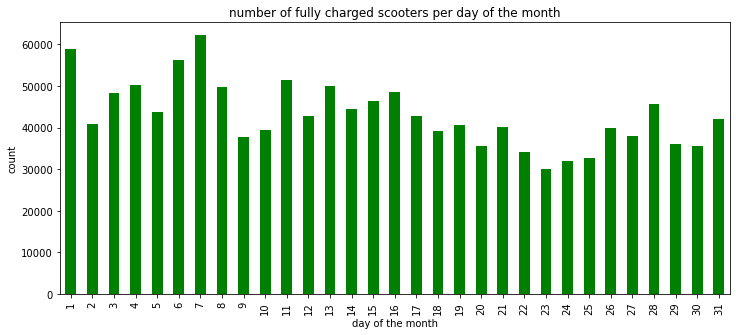

In [20]:
full_day_of_month.plot(kind="bar", figsize=(12,5), color= 'green')

plt.title('number of fully charged scooters per day of the month')
plt.xlabel('day of the month')
plt.ylabel('count')

Text(0, 0.5, 'count')

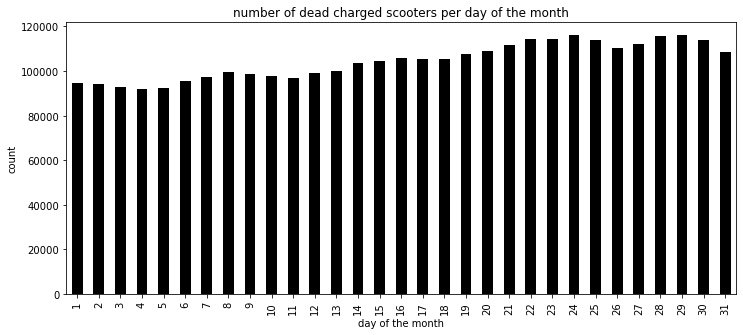

In [21]:
dead_day_of_month.plot(kind="bar", figsize=(12,5), color= 'black')

plt.title('number of dead charged scooters per day of the month')
plt.xlabel('day of the month')
plt.ylabel('count')

##ignore
full_day_of_month.plot(kind="bar",figsize=(15, 8), color ='red')
dead_day_of_month.plot(kind="bar",figsize=(15, 8))

In [23]:
nash = [36.174465, -86.767960]

In [25]:
zip = gpd.read_file('../data/zipcodes.geojson')
zip.head(5)

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [27]:
full_zip = gpd.sjoin(full_charge, zip, op = 'within')
full_zip.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour,index_right,zip,objectid,po_name,shape_stlength,shape_starea
18106104,2019-07-22 23:52:06.760,36.173757,-86.784629,PoweredJALW3,100.0,0.15,Bird,POINT (-86.78463 36.17376),2019-07-22,22,23,36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
9013182,2019-07-11 12:06:22.510,36.166128,-86.777904,PoweredF3X21,100.0,0.15,Bird,POINT (-86.77790 36.16613),2019-07-11,11,12,36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
9013177,2019-07-11 12:06:22.510,36.168789,-86.780815,Powered9QVU5,100.0,0.15,Bird,POINT (-86.78082 36.16879),2019-07-11,11,12,36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
9010713,2019-07-11 12:01:21.797,36.168802,-86.780805,Powered4Z8DW,100.0,0.15,Bird,POINT (-86.78081 36.16880),2019-07-11,11,12,36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082
9013207,2019-07-11 12:06:22.510,36.159007,-86.777417,PoweredZ6T75,100.0,0.15,Bird,POINT (-86.77742 36.15901),2019-07-11,11,12,36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082


In [28]:
dead_zip = gpd.sjoin(dead_charge, zip, op = 'within')
dead_zip.head(5)

,pubdatetime,latitude,longitude,sumdid,chargelevel,costpermin,companyname,geometry,date,day,hour,index_right,zip,objectid,po_name,shape_stlength,shape_starea
14088404,2019-07-17 18:23:13,36.1200,-86.7534,Powered4501372e-4eba-5c5f-9209-5f6783eb4501,0.0,0.06,Jump,POINT (-86.75340 36.12000),2019-07-17,17,18,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
14088408,2019-07-17 18:23:13,36.1201,-86.7533,Powereddaea7e85-6310-539f-b7bd-030baa5efef5,0.0,0.06,Jump,POINT (-86.75330 36.12010),2019-07-17,17,18,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
14082472,2019-07-17 18:13:13,36.1200,-86.7536,Powered24c4e34b-b792-52c6-b90d-0450f3a71953,0.0,0.06,Jump,POINT (-86.75360 36.12000),2019-07-17,17,18,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
19591346,2019-07-24 23:44:42,36.1201,-86.7531,Powered66039090-df59-5956-8c4b-c9255cb56351,0.0,0.06,Jump,POINT (-86.75310 36.12010),2019-07-24,24,23,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328
19591353,2019-07-24 23:44:42,36.1202,-86.7533,Powerede4138a33-4d2e-5ce4-ad3c-9da496472b9d,0.0,0.06,Jump,POINT (-86.75330 36.12020),2019-07-24,24,23,49,37211,39,NASHVILLE,290587.58467925159,602215091.79736328


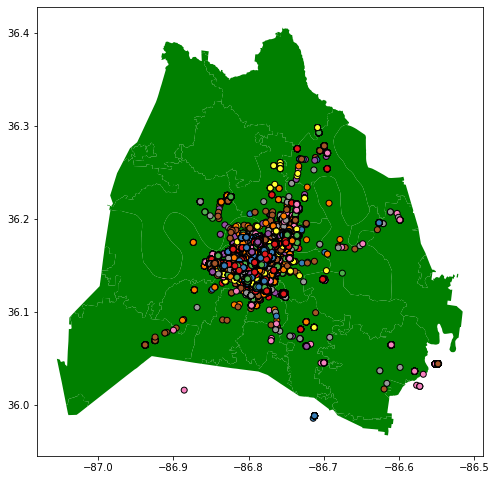

In [47]:
ax_f = zip.plot(figsize = (8,10), color = 'green')
full_charge.plot(ax = ax_f, column = 'sumdid', edgecolor = 'black', cmap= 'Set1')
plt.show();

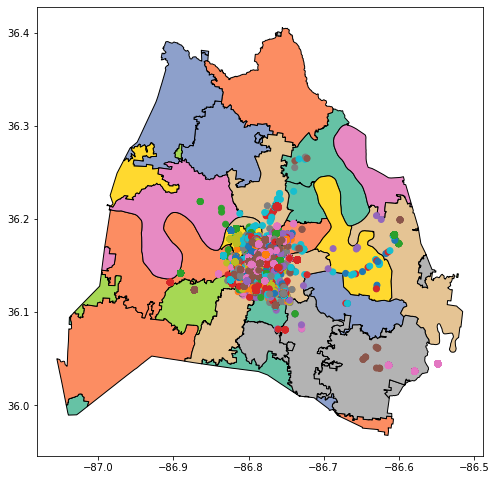

In [48]:
ax_d = zip.plot(figsize = (8,10), color = 'green', edgecolor = 'black', cmap = 'Set2')
dead_charge.plot(ax = ax_d, column = 'sumdid')
plt.show();

full_map = folium.Map(location = nash, zoom_start = 11)

folium.GeoJson(full_zip).add_to(full_map)

for row_index, row_values in zip.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['sumdid'])
    icon = folium.Icon(color='blue')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    
    marker.add_to(parks_map)

parks_map

full_cluster_map = folium.Map(location = nash, zoom_start = 11)

marker_cluster = MarkerCluster().add_to(full_cluster_map)

folium.GeoJson(zip).add_to(full_map)

for row_index, row_values in zip.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['name'])
    icon = folium.Icon(color='blue', icon = 'fa-tint', prefix= 'fa')
    
    marker = folium.Marker(location = loc, popup = pop, icon = icon)
    marker.add_to(marker_cluster)

In [ ]:
full_cluster_map